# CSS01 Network Analysis

* [Networkx Tutorial](https://networkx.org/documentation/stable/tutorial.html)
* [Intro to network analysis in python](https://trenton3983.github.io/files/projects/2020-05-21_intro_to_network_analysis_in_python/2020-05-21_intro_to_network_analysis_in_python.html) by Trenton McKinney (Recommended!)
* [Applied Graphical Network Analysis using Python](https://towardsdatascience.com/applied-network-analysis-using-python-25021633a702)
* [NetworkX:Network Analysis with Python](https://www.cl.cam.ac.uk/teaching/1415/L109/l109-tutorial_2015.pdf)
* [Network analysis for liquistics](https://alvinntnu.github.io/python-notes/statistical-analyses/network-analysis.html) by AlvinChen (Good!)
* [igraph with python](https://alvinntnu.github.io/python-notes/statistical-analyses/network-analysis-igraph.html) by Alvin Chen (Good!)
* [Text network analysis](https://towardsdatascience.com/text-network-analysis-generate-beautiful-network-visualisations-a373dbe183ca) towarddatascience (Good!)

## Building Network

In [37]:
# colab
import pickle
!wget https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat -O pttpost_20210509_n178.dat
with open("pttpost_20210509_n178.dat", "rb") as fin:
    all_post = pickle.load(fin)

--2022-11-18 18:27:58--  https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/P4CSS/PSS/master/data/pttpost_20210509_n178.dat [following]
--2022-11-18 18:27:59--  https://raw.githubusercontent.com/P4CSS/PSS/master/data/pttpost_20210509_n178.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 992132 (969K) [application/octet-stream]
Saving to: 'pttpost_20210509_n178.dat'

pttpost_20210509_n1 100%[===================>] 968.88K  3.59MB/s    in 0.3s    

2022-11-18 18:28:00 (3.59 MB/s) - 'pttpost_20210509_n178.dat' saved [992132/992

### Collocation as Cooccurrence

In [38]:
from collections import Counter
user_pair_counts = Counter()
len(all_post)
for post in all_post:
    for i, c1 in enumerate(post['comments']):
        for j, c2 in enumerate(post['comments']):
            if j >= 0 and j != i and j > i-5 and j < i+5 :
                u1, u2 = c1['userid'], c2['userid']
                if u1 != u2:
                    user_pair_counts[(u1, u2)] += 1

for pair, c in user_pair_counts.most_common(10):
    print("%s\t%s\t%d" % (pair[0], pair[1], c))

Runna	iampig951753	32
iampig951753	Runna	32
psl7634	gustavek	21
gustavek	psl7634	21
sl11pman	cwh0105	16
cwh0105	sl11pman	16
username1	l88	15
l88	username1	15
AIronKuma	lagadidi	14
lagadidi	AIronKuma	14


In [39]:
li = [(u1, u2, n)for (u1, u2), n in user_pair_counts.most_common() if n > 3]
df = pd.DataFrame.from_records(li, columns =['u1', 'u2', 'n'])
df

,u1,u2,n
0,Runna,iampig951753,32
1,iampig951753,Runna,32
2,psl7634,gustavek,21
3,gustavek,psl7634,21
4,sl11pman,cwh0105,16
...,...,...,...
667,kingstongyu,cecille,4
668,kingstongyu,kid1a2b3c4d,4
669,kid1a2b3c4d,kingstongyu,4
670,kid1a2b3c4d,kuan12065,4


## Drawing network


### matplotlib & networkx

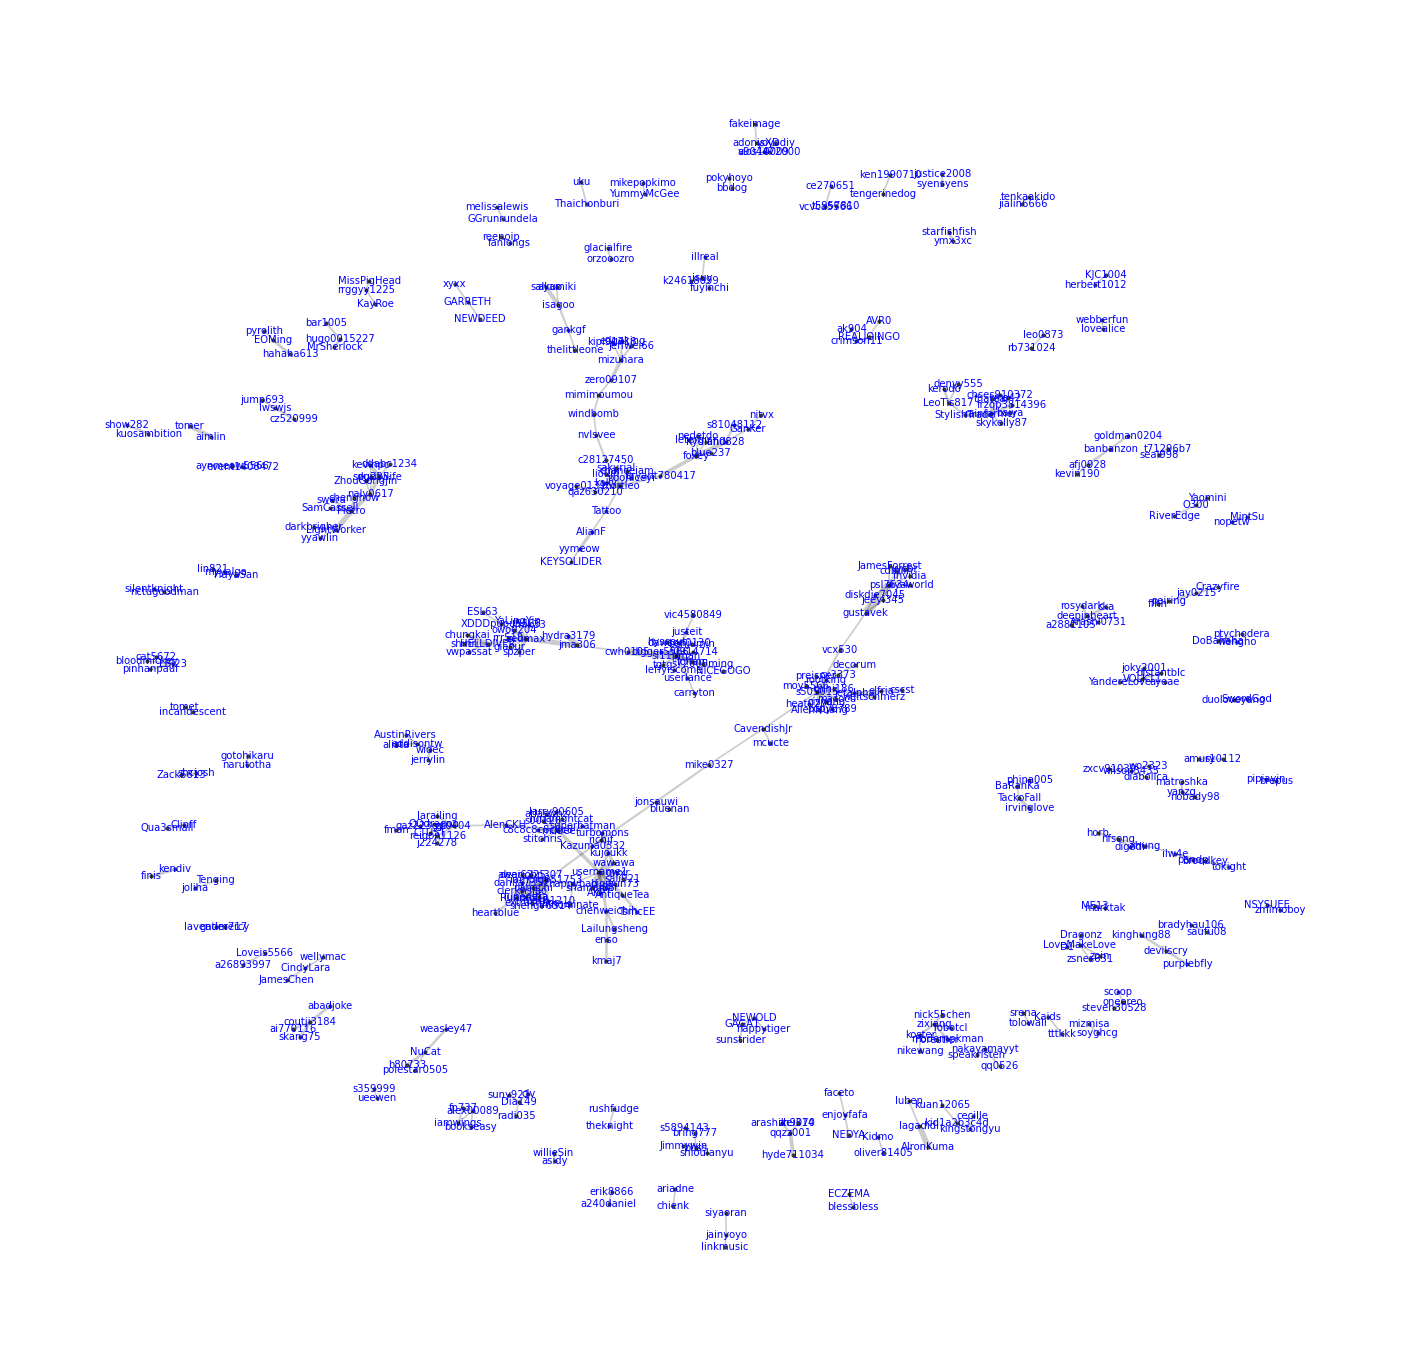

In [40]:
import matplotlib.pyplot as plt

import networkx as nx

fig = plt.figure(1, figsize=(30, 30), dpi=60)

G = nx.from_pandas_edgelist(df,
                            source = 'u1',
                            target = 'u2',
                            edge_attr = 'n')

widths = nx.get_edge_attributes(G, 'n')
nodelist = G.nodes()
# nx.draw_kamada_kawai(G,
#                     node_size = 5,
#                     edge_color = "#8833FF",
#                     with_labels = True)

pos = nx.spring_layout(G)
# nx.draw_spring(G,
#                node_size = 5,
#                edge_color = "#8833FF",
#                font_size = 16,
#                with_labels = True)

nx.draw_networkx_nodes(G, pos,
                       nodelist=nodelist,
                       node_size=15,
                       node_color='black',
                       alpha=0.7)

nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list([w/2 for w in widths.values()]),
                       edge_color='black',
                       alpha=0.2)

nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='blue')
plt.box(False)
plt.show()

### pyvis.network

In [41]:
from pyvis.network import Network
net = Network('1024px', '2048px', notebook=True)
net.from_nx(G)
net.show("test.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Node-level analysis

Reference
- https://trenton3983.github.io/files/projects/2020-05-21_intro_to_network_analysis_in_python/2020-05-21_intro_to_network_analysis_in_python.html

In [42]:
# !pip install networkx
# !pip install nxviz

import networkx as nx
import nxviz as nv
import matplotlib as mpl
import matplotlib.pyplot as plt

print(f'NetworkX version: {nx.__version__}')
print(f'Matplotlib version: {mpl.__version__}')
# print(f'NXViz version: {nv.__version__}')


NetworkX version: 2.7.1
Matplotlib version: 3.5.1


In [43]:
print(len(G.edges()))
print(len(G.nodes()))

336
410


### Degree histogram

In [44]:
dhist = nx.degree_histogram(G)
dhist

[0, 286, 74, 27, 8, 4, 1, 2, 1, 3, 0, 0, 2, 2]

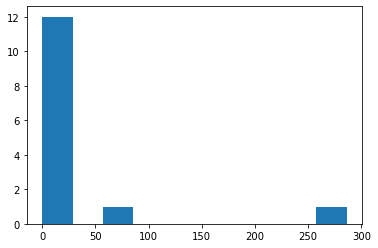

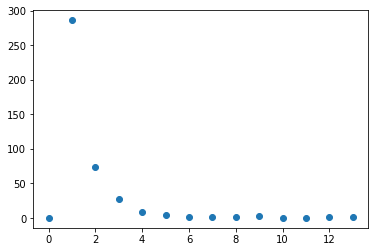

In [45]:
plt.figure()
plt.hist(dhist)
plt.show()

plt.figure()
plt.scatter(range(0, len(dhist)), dhist)
plt.show()

### Degree centrality

In [65]:
dc = nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
cc = nx.closeness_centrality(G)

c_df = pd.DataFrame([(k, v, bc[k], cc[k]) for k, v in dc.items()], columns=["name", "degreeC", "betweenC", "closeC"])
c_df.sort_values("degreeC", ascending=False)

,name,degreeC,betweenC,closeC
56,s505015,0.031785,0.019452,0.033651
1,iampig951753,0.031785,0.024348,0.044203
4,sl11pman,0.029340,0.003715,0.028211
6,username1,0.029340,0.022382,0.041179
16,zeumax,0.022005,0.003296,0.026512
...,...,...,...,...
187,goldman0204,0.002445,0.000000,0.003667
184,MrSherlock,0.002445,0.000000,0.003260
181,awei6225,0.002445,0.000000,0.036138
179,popy8789,0.002445,0.000000,0.028765


## Global network analysis

In [49]:
nx.density(G)

0.004007394597173356

In [51]:
nx.number_connected_components(G)

89

In [59]:
max_component = sorted(nx.connected_components(G), key=len, reverse=True)[0]
max_subgraph = G.subgraph(max_component)

In [60]:
print(f"radius: {nx.radius(max_subgraph)}")
print(f"diameter: {nx.diameter(max_subgraph)}")
print(f"eccentricity: {nx.eccentricity(max_subgraph)}")
print(f"center: {nx.center(max_subgraph)}")
print(f"periphery: {nx.periphery(max_subgraph)}")
print(f"density: {nx.density(max_subgraph)}")

radius: 8
diameter: 16
eccentricity: {'fman': 16, 'stja': 10, 'superbatman': 13, 'AKPT': 12, 'jonsauwi': 9, 'larailing': 15, 'preisner': 13, 'turbomons': 13, 'wawawa': 12, 'diyaworld': 16, 'elfria': 14, 'username1': 11, 'bluenan': 10, 'iampig951753': 9, 'extrachaos': 10, 'mudee': 12, 'sali921': 12, 'rootking': 13, 'heat0204': 13, 'AntiqueTea': 12, 'Runna': 10, 'moy5566': 13, 'cx3373': 13, 'JamesForrest': 16, 'Kazuma0332': 9, 'cdmlin': 16, 'dahlia7357': 10, 'gustavek': 14, 'atlaswhz': 13, 'AlenCKH': 13, 'stitchris': 13, 'popy8789': 13, 'lunenera': 10, 'cisyong': 13, 'awei6225': 10, 'happybad': 10, 'gt0404': 14, 'chenweichih': 12, 'mike0327': 10, 'qwxr': 12, 'cscst': 15, 'psl7634': 15, 'AllenHuang': 13, 'diskdie7045': 15, 'CavendishJr': 11, 'TsmcEE': 13, 'CTUST': 15, 'weltschmerz': 14, 'larry90605': 13, 'reigon1126': 15, 'nanachi': 10, 'j224278': 15, 'kmaj7': 14, 'c8c8c8c8c8c8': 13, 'QQdragon': 15, 'jeeyi345': 15, 'mcucte': 12, 'mach1210': 10, 'dearjohn307': 10, 'yycbr': 16, 'heartblue':

## Components

In [21]:
" ".join([str(len(conn)) for conn in sorted(nx.connected_components(G), key=len, reverse=True)])

'81 31 31 13 11 8 7 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2'

### Get top 3 components

In [22]:
for nodelist in sorted(nx.connected_components(G), key=len, reverse=True)[:3]:
    print(len(nodelist))

81
31
31


In [23]:
# top3_nodelists is just nodelists of top3 subgraph
top3_nodelists = sorted(nx.connected_components(G), key=len, reverse=True)[:3]

# Merge three nodelists
top3nodes = list(set().union(*top3_nodelists))

# top3nodes = []
# for nodelist in top3_nodelists:
#     top3nodes.extend(list(nodelist))
    
# Retrieve Subset of G
subG = G.subgraph(top3nodes)

In [24]:
sorted(list(subG.nodes))
len(subG.edges)
len(subG.nodes)
# len(G.nodes)
# len(G.edges)

143

### Viz by matplotlib

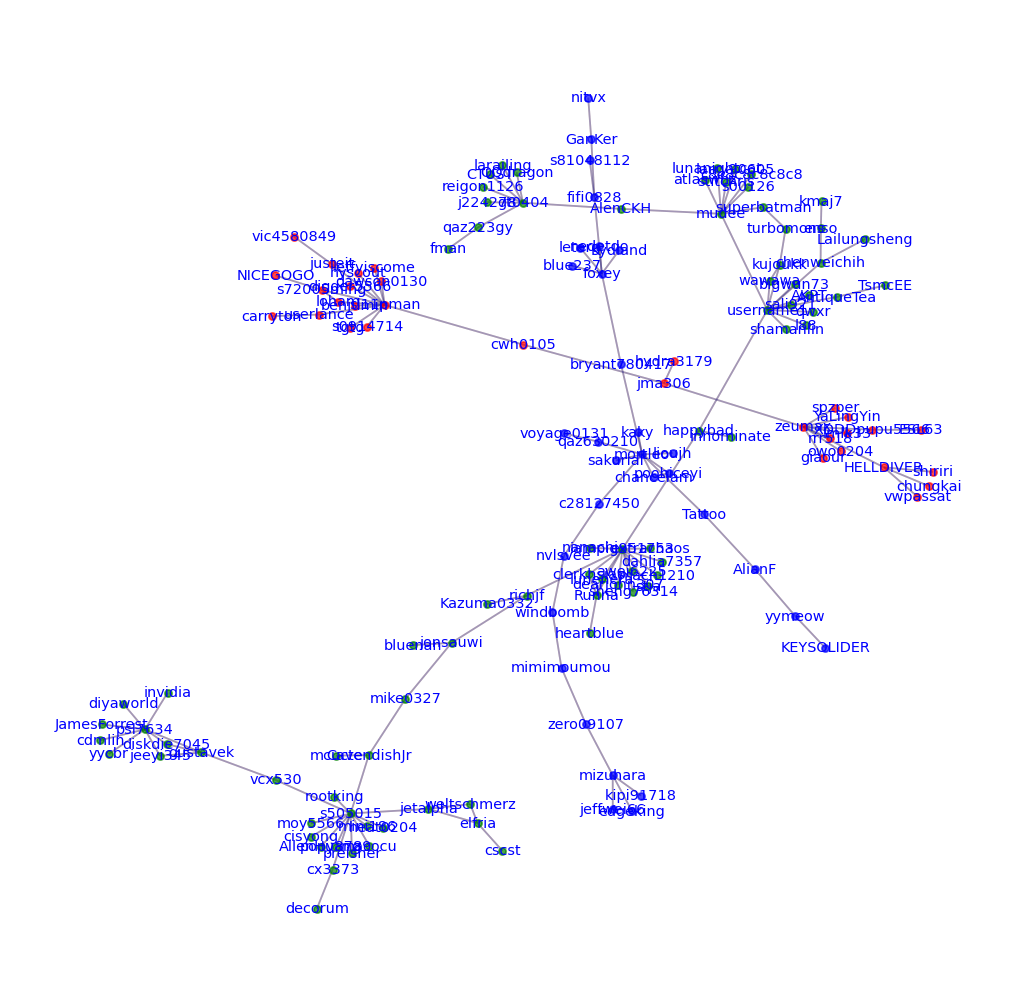

In [25]:
fig = plt.figure(1, figsize=(10, 10), dpi=130)
colorlist = [ 'r', 'g', 'b', 'c', 'm', 'y', 'k' ]

pos = nx.spring_layout(subG)


for index, sg in enumerate(nx.connected_components(subG)):  #there's probably a more elegant approach using zip
    nx.draw_networkx_nodes(subG, pos=pos,
                           nodelist = sg,
                           node_size = 15,
                           node_color = colorlist[index],
                           alpha = 0.7)
    nx.draw_networkx_labels(subG, pos=pos,
                            labels=dict(zip(sg,sg)),
                            font_color='blue',
                            font_size=8)
    nx.draw_networkx_edges(subG, pos=pos,
                           edgelist = nx.get_edge_attributes(subG, 'n').keys(),
                           # width=list(nx.get_edge_attributes(subG, 'n').keys()),
                           edge_color=colorlist[index],
                           alpha=0.2)

plt.box(False)
plt.show()

### Vis by pyviz

In [26]:
attr = {node:index for index, sg in enumerate(nx.connected_components(subG)) for node in sg}
nx.set_node_attributes(subG, attr, name="group")
subG.nodes(data=True)

NodeDataView({'chungkai': {'size': 10, 'group': 0}, 'fman': {'size': 10, 'group': 1}, 'stja': {'size': 10, 'group': 1}, 'giaour': {'size': 10, 'group': 0}, 'superbatman': {'size': 10, 'group': 1}, 'AKPT': {'size': 10, 'group': 1}, 'jonsauwi': {'size': 10, 'group': 1}, 'owo0204': {'size': 10, 'group': 0}, 'cwh0105': {'size': 10, 'group': 0}, 'c28127450': {'size': 10, 'group': 2}, 'larailing': {'size': 10, 'group': 1}, 'preisner': {'size': 10, 'group': 1}, 'turbomons': {'size': 10, 'group': 1}, 'wawawa': {'size': 10, 'group': 1}, 'hydra3179': {'size': 10, 'group': 0}, 'diyaworld': {'size': 10, 'group': 1}, 'elfria': {'size': 10, 'group': 1}, 'sl11pman': {'size': 10, 'group': 0}, 'username1': {'size': 10, 'group': 1}, 'KEYSOLIDER': {'size': 10, 'group': 2}, 'bluenan': {'size': 10, 'group': 1}, 'hyscout': {'size': 10, 'group': 0}, 'iampig951753': {'size': 10, 'group': 1}, 'fifi0828': {'size': 10, 'group': 2}, 'loham': {'size': 10, 'group': 0}, 'digger5566': {'size': 10, 'group': 0}, 's0914

In [27]:
net = Network('1024px', '2048px', notebook=True)
net.from_nx(subG)
net.show_buttons(filter_=['physics'])
# net.show("test.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Community

### Build-up network

In [28]:
from collections import Counter
user_pair_counts = Counter()
for post in all_post:
    for i, c1 in enumerate(post['comments']):
        for j, c2 in enumerate(post['comments']):
            if j != i:
                u1, u2 = c1['userid'], c2['userid']
                if u1 != u2:
                    user_pair_counts[(u1, u2)] += 1

for pair, c in user_pair_counts.most_common(10):
    print("%s\t%s\t%d" % (pair[0], pair[1], c))
    
li = [(u1, u2, n)for (u1, u2), n in user_pair_counts.most_common() if n > 10]
df = pd.DataFrame.from_records(li, columns =['u1', 'u2', 'n'])
df

s72005ming	sl11pman	450
loham	sl11pman	450
sl11pman	s72005ming	450
sl11pman	loham	450
cwh0105	sl11pman	360
sl11pman	cwh0105	360
iampig951753	Runna	308
Runna	iampig951753	308
frank355571	sl11pman	270
sl11pman	frank355571	270


,u1,u2,n
0,s72005ming,sl11pman,450
1,loham,sl11pman,450
2,sl11pman,s72005ming,450
3,sl11pman,loham,450
4,cwh0105,sl11pman,360
...,...,...,...
1483,superbatman,username1,11
1484,vwpassat,zeumax,11
1485,zeumax,vwpassat,11
1486,zeumax,giaour,11


#### Drawing original network

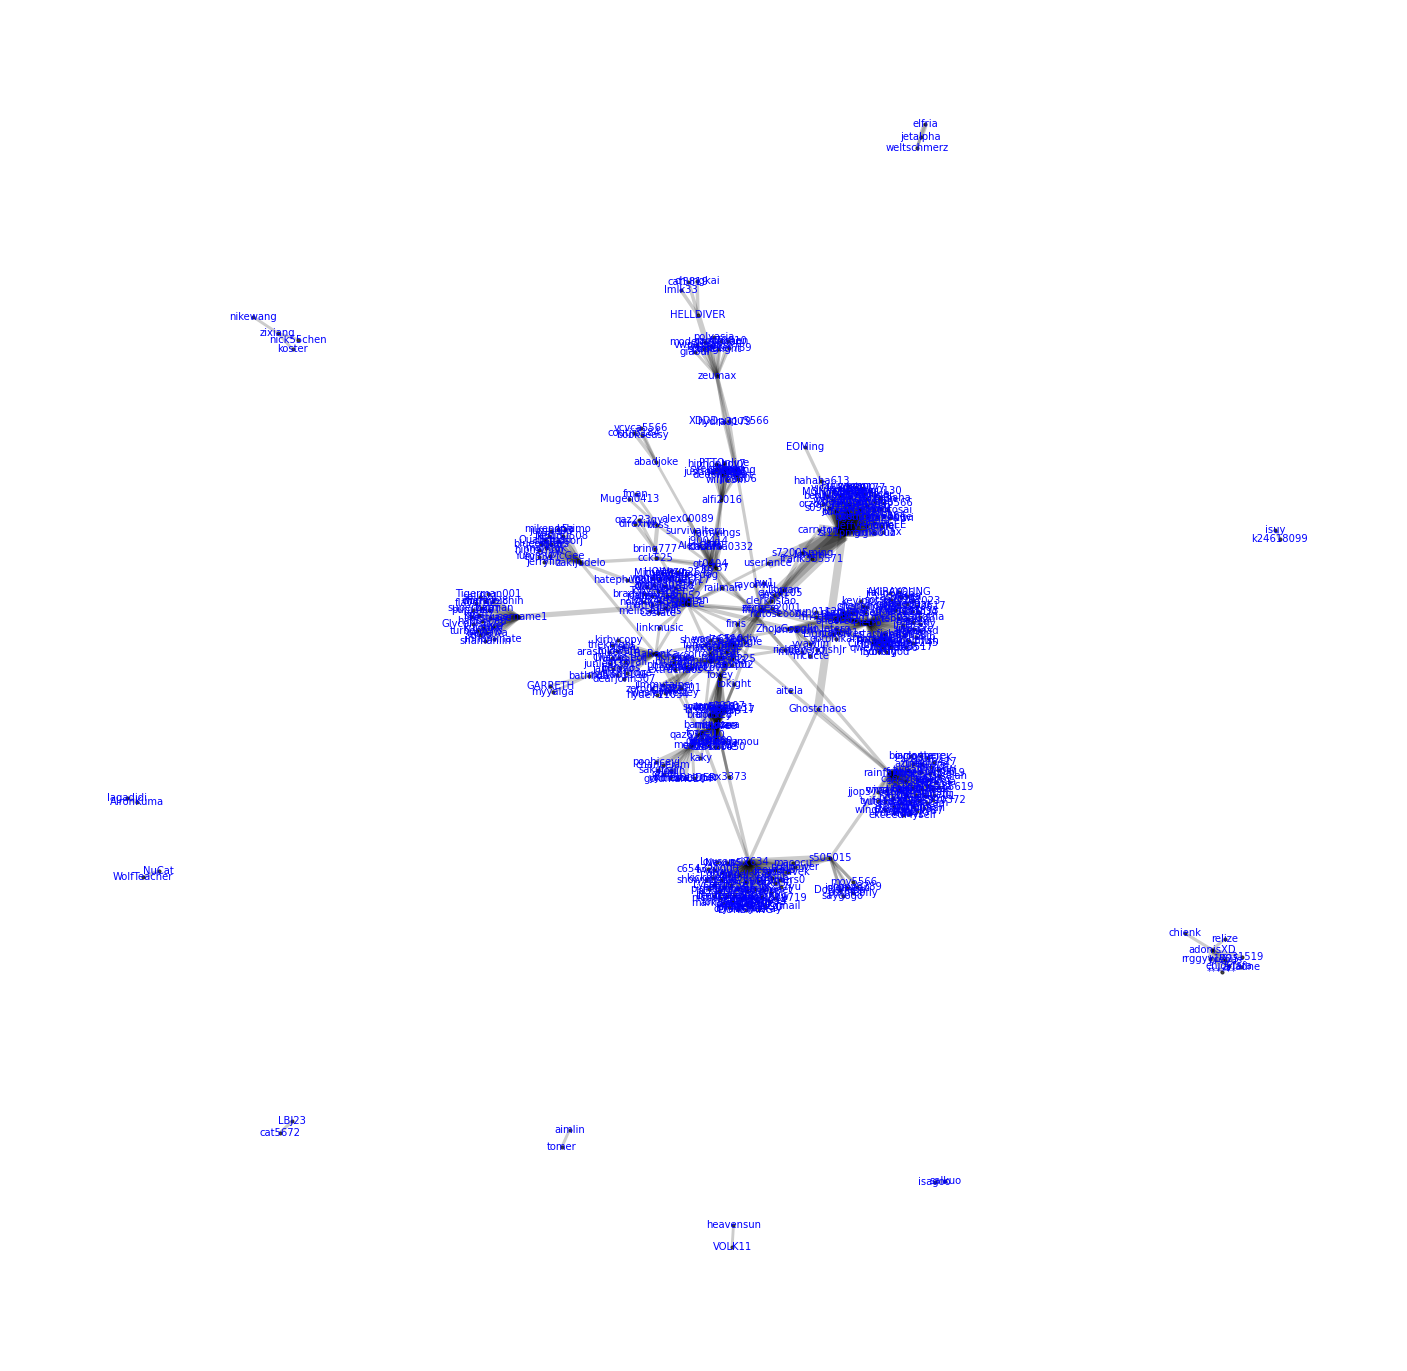

In [30]:
import math
import matplotlib.pyplot as plt
import networkx as nx

fig = plt.figure(1, figsize=(30, 30), dpi=60)

G = nx.from_pandas_edgelist(df,
                            source = 'u1',
                            target = 'u2',
                            edge_attr = 'n')

widths = nx.get_edge_attributes(G, 'n')
nodelist = G.nodes()
# nx.draw_kamada_kawai(G,
#                     node_size = 5,
#                     edge_color = "#8833FF",
#                     with_labels = True)

pos = nx.spring_layout(G)
# nx.draw_spring(G,
#                node_size = 5,
#                edge_color = "#8833FF",
#                font_size = 16,
#                with_labels = True)

nx.draw_networkx_nodes(G, pos,
                       nodelist=nodelist,
                       node_size=15,
                       node_color='black',
                       alpha=0.7)

nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list([math.sqrt(w) for w in widths.values()]),
                       edge_color='black',
                       alpha=0.2)

nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='blue')
plt.box(False)
plt.show()

### Maximum component

In [31]:
topG = sorted(nx.connected_components(G), key=len, reverse=True)[0]
len(topG)

subG = G.subgraph(topG)

#### Viz the maximum component

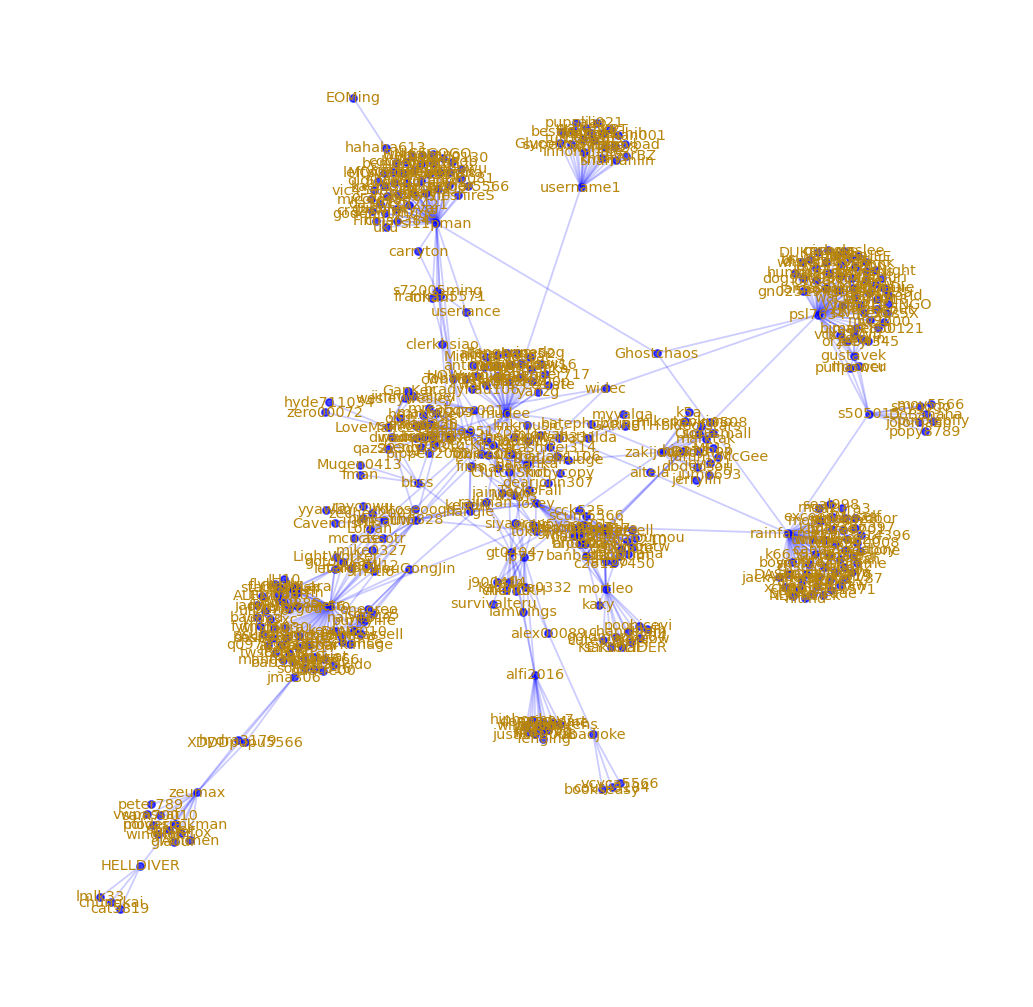

In [32]:

fig = plt.figure(1, figsize=(10, 10), dpi=130)
colorlist = [ 'b', 'g', 'b', 'c', 'm', 'y', 'k' ]

pos = nx.spring_layout(subG)


for index, sg in enumerate(nx.connected_components(subG)):  #there's probably a more elegant approach using zip
    nx.draw_networkx_nodes(subG, pos=pos,
                           nodelist = sg,
                           node_size = 15,
                           node_color = colorlist[index],
                           alpha = 0.7)
    nx.draw_networkx_labels(subG, pos=pos,
                            labels=dict(zip(sg,sg)),
                            font_color='darkgoldenrod',
                            font_size=8)
    nx.draw_networkx_edges(subG, pos=pos,
                           edgelist = nx.get_edge_attributes(subG, 'n').keys(),
                           # width=list(nx.get_edge_attributes(subG, 'n').keys()),
                           edge_color=colorlist[index],
                           alpha=0.2)
plt.box(False)
plt.show()

### Detect communities

- https://networkx.org/documentation/stable/reference/algorithms/community.html

In [33]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(subG)
top_level_communities = next(communities_generator)
second_level_communities = next(communities_generator)

In [34]:
print(len(top_level_communities))
print(len(second_level_communities))

2
3


#### Viz communities

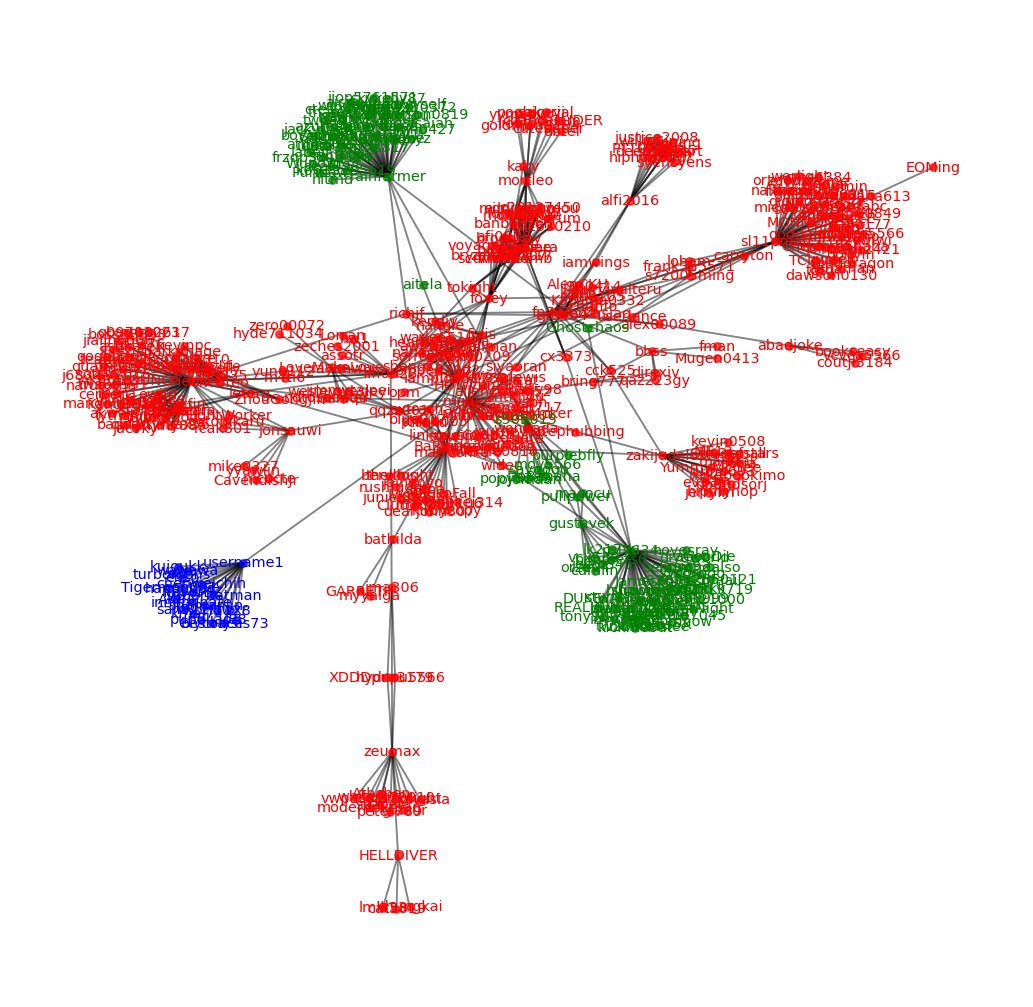

In [35]:
fig = plt.figure(1, figsize=(10, 10), dpi=130)
colorlist = [ 'r', 'g', 'b', 'c', 'm', 'y', 'k' ]

pos = nx.spring_layout(subG)
for index, sg in enumerate(second_level_communities):  #there's probably a more elegant approach using zip
    nx.draw_networkx_nodes(subG, pos=pos,
                           nodelist = sg,
                           node_size = 15,
                           node_color = colorlist[index],
                           alpha = 0.7)
    nx.draw_networkx_labels(subG, pos=pos,
                            labels=dict(zip(sg,sg)),
                            font_color=colorlist[index],
                            font_size=8)
    nx.draw_networkx_edges(subG, pos=pos,
                           edgelist = nx.get_edge_attributes(subG, 'n').keys(),
                           # width=list(nx.get_edge_attributes(subG, 'n').keys()),
                           # edge_color=colorlist[index],
                           alpha=0.2)

plt.box(False)
plt.show()

#### viz communities by pyvis

In [36]:
# from pyvis.network import Network as net
from pyvis import network as net
# net = Network('1024px', '2048px', notebook=True)

attr = {node:index for index, sg in enumerate(second_level_communities) for node in sg}
nx.set_node_attributes(subG, attr, name="group")
visnet = net.Network('768px', '768px', notebook=True)
# net = Network('768px', '768px')
visnet.from_nx(subG)
visnet.show('nx.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
